# MGE functions: usage examples and tests

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from astropy import table, units as u

import mgetools as mge

First let's read in the example MGE file. This is a projected MGE with widths in angular units, and is flattened (q<1).

In [2]:
mge2d = table.QTable.read("mge2d.dat", format="ascii")
print(mge2d)

      i         s     q  
solMass / pc2 arcsec     
------------- ------ ----
       3500.0   50.0  0.7
       5000.0  100.0 0.75
       2500.0  150.0  0.8
       1600.0  200.0 0.85
        800.0  300.0  0.9
        200.0  500.0 0.95
         50.0  900.0  1.0
         10.0 1200.0  1.0


Let's deproject this, assuming an inclination of 80 deg and a distance of 10 kpc.

In [3]:
mge3d = mge.Deproject(mge2d, inclination=80*u.deg, distance=10*u.kpc)
print(mge3d)

         i                  s                  q         
   solMass / pc3            pc                           
------------------- ------------------ ------------------
  585.5667183025229   2.42406840554768 0.6885807765947729
 416.50555832385794   4.84813681109536 0.7408762367595404
  138.3614785342815  7.272205216643041 0.7929736228366776
   66.2268165676091   9.69627362219072 0.8449095755494197
  22.02385752031475 14.544410433286082 0.8967121451257951
  3.297051951142733   24.2406840554768  0.948403188310614
0.45715417872653497 43.633231299858245                1.0
0.06857312680898024  58.17764173314433                1.0


---

## Surface Density

First let's plot the surface density map in two dimensions (x and y) for the projected (2d) MGE.

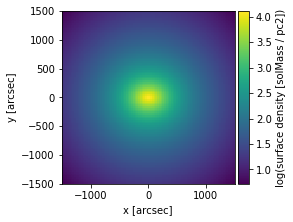

In [4]:
# full grid of R and z values, linear spacing
xy = np.linspace(-1500, 1500, 100)
x, y = np.meshgrid(xy, xy)*u.arcsec

# calculate surface density
surface_density = mge.SurfaceDensity(mge2d, x, y)

# plot log surface density map
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0.20, 0.15, 0.60, 0.80])
plt.xlabel("x [{:}]".format(x.unit))
plt.ylabel("y [{:}]".format(y.unit))
cols = plt.imshow(np.log10(surface_density.value), origin="lower", aspect="equal", interpolation="nearest",
           extent=(x.min().value, x.max().value, y.min().value, y.max().value))
cax = fig.add_axes([0.81, 0.15, 0.04, 0.80])
plt.colorbar(cols, cax=cax, orientation="vertical")
plt.ylabel("log(surface density [{:}])".format(surface_density.unit))
plt.show()

And now let's look at the surface densities along the major (x) and minor (y) axes. These are not identical as the system is flattened.

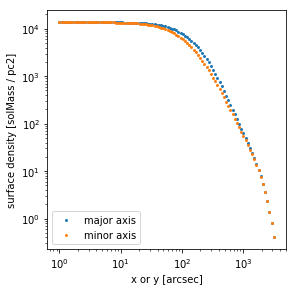

In [5]:
# quarter grid of R and z values, log spacing
log_xy = np.logspace(0, 3.5, 100)
log_x, log_y = np.meshgrid(log_xy, log_xy)*u.arcsec

# calculate surface density
surface_density = mge.SurfaceDensity(mge2d, log_x, log_y)

plt.figure(figsize=(4,4))
plt.subplots_adjust(left=0.15, right=0.98, bottom=0.15, top=0.98)
plt.loglog()
plt.scatter(log_x[0], surface_density[0], s=9, lw=0, label="major axis")
plt.scatter(log_y[:,0], surface_density[:,0], s=9, lw=0, label="minor axis")
plt.legend()
plt.xlabel("x or y [{:}]".format(log_x.unit))
plt.ylabel("surface density [{:}]".format(surface_density.unit))
plt.show()

---

## Volume Density

Now we consider the deprojected (3d) MGE. Again, let's start with the two dimensional density map in (R and z).

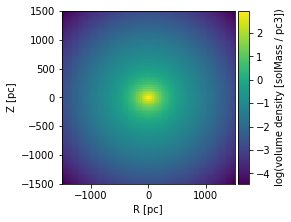

In [6]:
# full grid of R and z values, linear spacing
Rz = np.linspace(-160, 160, 100)
R, z = np.meshgrid(Rz, Rz)*u.pc

# calculate volume density
volume_density = mge.VolumeDensity(mge3d, R, z)

# plot log volume density map
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0.20, 0.15, 0.60, 0.80])
plt.xlabel("R [{:}]".format(R.unit))
plt.ylabel("Z [{:}]".format(z.unit))
cols = plt.imshow(np.log10(volume_density.value), origin="lower", aspect="equal", interpolation="nearest",
           extent=(x.min().value, x.max().value, y.min().value, y.max().value))
cax = fig.add_axes([0.81, 0.15, 0.04, 0.80])
plt.colorbar(cols, cax=cax, orientation="vertical")
plt.ylabel("log(volume density [{:}])".format(volume_density.unit))
plt.show()

Again, we can also look at the density along the R and z axes separately, which is are slightly different due to the flattening of the MGE.

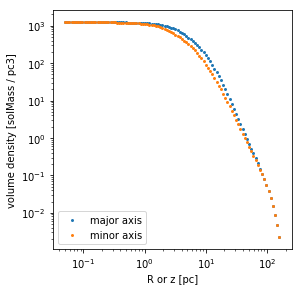

In [7]:
# quarter grid of R and z values, log spacing
log_Rz = np.logspace(-1.3, 2.2, 100)
log_R, log_z = np.meshgrid(log_Rz, log_Rz)*u.pc

# calculate volume density
volume_density = mge.VolumeDensity(mge3d, log_R, log_z)

plt.figure(figsize=(4,4))
plt.subplots_adjust(left=0.15, right=0.98, bottom=0.15, top=0.98)
plt.loglog()
plt.scatter(log_R[0], volume_density[0], s=9, lw=0, label="major axis")
plt.scatter(log_z[:,0], volume_density[:,0], s=9, lw=0, label="minor axis")
plt.legend()
plt.xlabel("R or z [{:}]".format(log_R.unit))
plt.ylabel("volume density [{:}]".format(volume_density.unit))
plt.show()

---

## Deprojection

In [8]:
# Test 1: spherical MGE with widths in physical units
test1 = mge2d.copy()
test1["q"] = np.ones(len(test1))
test1["s"] = (test1["s"]*10*u.kpc/u.rad).to("pc")
print(test1)

# this should run without any keywords
result1 = mge.Deproject(test1)
print(result1)

      i               s           q 
solMass / pc2         pc            
------------- ------------------ ---
       3500.0   2.42406840554768 1.0
       5000.0   4.84813681109536 1.0
       2500.0  7.272205216643041 1.0
       1600.0   9.69627362219072 1.0
        800.0 14.544410433286082 1.0
        200.0   24.2406840554768 1.0
         50.0 43.633231299858245 1.0
         10.0  58.17764173314433 1.0
         i                  s           q 
   solMass / pc3            pc            
------------------- ------------------ ---
  576.0142651954341   2.42406840554768 1.0
  411.4387608538815   4.84813681109536 1.0
  137.1462536179605  7.272205216643041 1.0
  65.83020173662104   9.69627362219072 1.0
  21.94340057887368 14.544410433286082 1.0
  3.291510086831052   24.2406840554768 1.0
0.45715417872653497 43.633231299858245 1.0
0.06857312680898024  58.17764173314433 1.0


In [9]:
# Test 2: spherical MGE with widths in angular units
test2 = mge2d.copy()
test2["q"] = np.ones(len(test2))
print(test2)

# this should fail without any keywords
result = mge.Deproject(test2)
print(result)

# but run ok with a distance provided
result = mge.Deproject(test2, distance=10*u.kpc)
print(result)

      i         s     q 
solMass / pc2 arcsec    
------------- ------ ---
       3500.0   50.0 1.0
       5000.0  100.0 1.0
       2500.0  150.0 1.0
       1600.0  200.0 1.0
        800.0  300.0 1.0
        200.0  500.0 1.0
         50.0  900.0 1.0
         10.0 1200.0 1.0
MGE.DEPROJECT: Distance required to convert widths from angular units to physical units.
None
         i                  s           q 
   solMass / pc3            pc            
------------------- ------------------ ---
  576.0142651954341   2.42406840554768 1.0
  411.4387608538815   4.84813681109536 1.0
  137.1462536179605  7.272205216643041 1.0
  65.83020173662104   9.69627362219072 1.0
  21.94340057887368 14.544410433286082 1.0
  3.291510086831052   24.2406840554768 1.0
0.45715417872653497 43.633231299858245 1.0
0.06857312680898024  58.17764173314433 1.0


In [10]:
# Test 3: flattened MGE with widths in physical units
test3 = mge2d.copy()
test3["s"] = (test3["s"]*10*u.kpc/u.rad).to("pc")
print(test3)

# this should fail without any keywords
result3 = mge.Deproject(test3)
print(result3)

# but run ok with an inclination provided
result3 = mge.Deproject(test3, inclination=80*u.deg)
print(result3)

      i               s           q  
solMass / pc2         pc             
------------- ------------------ ----
       3500.0   2.42406840554768  0.7
       5000.0   4.84813681109536 0.75
       2500.0  7.272205216643041  0.8
       1600.0   9.69627362219072 0.85
        800.0 14.544410433286082  0.9
        200.0   24.2406840554768 0.95
         50.0 43.633231299858245  1.0
         10.0  58.17764173314433  1.0
MGE.DEPROJECT: Your MGE is flattened. Please provide an inclination.
None
         i                  s                  q         
   solMass / pc3            pc                           
------------------- ------------------ ------------------
  585.5667183025229   2.42406840554768 0.6885807765947729
 416.50555832385794   4.84813681109536 0.7408762367595404
  138.3614785342815  7.272205216643041 0.7929736228366776
   66.2268165676091   9.69627362219072 0.8449095755494197
  22.02385752031475 14.544410433286082 0.8967121451257951
  3.297051951142733   24.2406840554768  0.94

In [11]:
# Test 4: flattened MGE with widths in angular units (the main example)
print(mge2d)

# this should fail without any keywords
result = mge.Deproject(mge2d)
print(result)

# this should fail with only inclination provided
result = mge.Deproject(mge2d, inclination=80*u.deg)
print(result)

# this should fail with only distance provided
result = mge.Deproject(mge2d, distance=10*u.kpc)
print(result)

# but run ok with both distance and inclination provided
result = mge.Deproject(mge2d, distance=10*u.kpc, inclination=80*u.deg)
print(result)

      i         s     q  
solMass / pc2 arcsec     
------------- ------ ----
       3500.0   50.0  0.7
       5000.0  100.0 0.75
       2500.0  150.0  0.8
       1600.0  200.0 0.85
        800.0  300.0  0.9
        200.0  500.0 0.95
         50.0  900.0  1.0
         10.0 1200.0  1.0
MGE.DEPROJECT: Distance required to convert widths from angular units to physical units.
None
MGE.DEPROJECT: Distance required to convert widths from angular units to physical units.
None
MGE.DEPROJECT: Your MGE is flattened. Please provide an inclination.
None
         i                  s                  q         
   solMass / pc3            pc                           
------------------- ------------------ ------------------
  585.5667183025229   2.42406840554768 0.6885807765947729
 416.50555832385794   4.84813681109536 0.7408762367595404
  138.3614785342815  7.272205216643041 0.7929736228366776
   66.2268165676091   9.69627362219072 0.8449095755494197
  22.02385752031475 14.544410433286082 0.89671

---
## Projection

In [12]:
# Test 1: spherical MGE, output widths in physical units
test1 = mge3d.copy()
test1["q"] = np.ones(len(test1))
print(test1)

# this should run without any keywords
result = mge.Project(test1)
print(result)

         i                  s           q 
   solMass / pc3            pc            
------------------- ------------------ ---
  585.5667183025229   2.42406840554768 1.0
 416.50555832385794   4.84813681109536 1.0
  138.3614785342815  7.272205216643041 1.0
   66.2268165676091   9.69627362219072 1.0
  22.02385752031475 14.544410433286082 1.0
  3.297051951142733   24.2406840554768 1.0
0.45715417872653497 43.633231299858245 1.0
0.06857312680898024  58.17764173314433 1.0
        i                  s           q 
  solMass / pc2            pc            
------------------ ------------------ ---
 3558.042982431116   2.42406840554768 1.0
 5061.574138754709   4.84813681109536 1.0
 2522.151988921735  7.272205216643041 1.0
1609.6397050721462   9.69627362219072 1.0
 802.9332533451915 14.544410433286082 1.0
200.33673688765856   24.2406840554768 1.0
              50.0 43.633231299858245 1.0
              10.0  58.17764173314433 1.0


In [13]:
# Test 2: flattened MGE, output widths in physical units
print(mge3d)

# this should fail without any keywords
result = mge.Project(mge3d)
print(result)

# but run ok with an inclination provided
result = mge.Project(mge3d, inclination=80*u.deg)
print(result)

         i                  s                  q         
   solMass / pc3            pc                           
------------------- ------------------ ------------------
  585.5667183025229   2.42406840554768 0.6885807765947729
 416.50555832385794   4.84813681109536 0.7408762367595404
  138.3614785342815  7.272205216643041 0.7929736228366776
   66.2268165676091   9.69627362219072 0.8449095755494197
  22.02385752031475 14.544410433286082 0.8967121451257951
  3.297051951142733   24.2406840554768  0.948403188310614
0.45715417872653497 43.633231299858245                1.0
0.06857312680898024  58.17764173314433                1.0
MGE.PROJECT: Your MGE is flattened. Please provide an inclination.
None
        i                  s                  q         
  solMass / pc2            pc                           
------------------ ------------------ ------------------
3499.9999999999995   2.42406840554768                0.7
            5000.0   4.84813681109536               0.75
     

In [14]:
# Test 3: spherical MGE, output widths in angular units
test3 = mge3d.copy()
test3["q"] = np.ones(len(test3))
print(test3)

# this should run without any keywords BUT won't give the angular units required!
result = mge.Project(test3)
print(result)

# this should fail if a distance is provided but no angular unit
result = mge.Project(test3, distance=10*u.kpc)
print(result)

# this should fail if an angular unit is provided but no distance
result = mge.Project(test3, angular_unit=u.arcsec)
print(result)

# but run ok with both a distance and angular unit
result = mge.Project(test3, distance=10*u.kpc, angular_unit=u.arcsec)
print(result)

         i                  s           q 
   solMass / pc3            pc            
------------------- ------------------ ---
  585.5667183025229   2.42406840554768 1.0
 416.50555832385794   4.84813681109536 1.0
  138.3614785342815  7.272205216643041 1.0
   66.2268165676091   9.69627362219072 1.0
  22.02385752031475 14.544410433286082 1.0
  3.297051951142733   24.2406840554768 1.0
0.45715417872653497 43.633231299858245 1.0
0.06857312680898024  58.17764173314433 1.0
        i                  s           q 
  solMass / pc2            pc            
------------------ ------------------ ---
 3558.042982431116   2.42406840554768 1.0
 5061.574138754709   4.84813681109536 1.0
 2522.151988921735  7.272205216643041 1.0
1609.6397050721462   9.69627362219072 1.0
 802.9332533451915 14.544410433286082 1.0
200.33673688765856   24.2406840554768 1.0
              50.0 43.633231299858245 1.0
              10.0  58.17764173314433 1.0
MGE.PROJECT: Both distance and angular_unit are required if you w

In [15]:
# Test 4: flattened MGE, output widths in angular units
print(mge3d)

# this should fail without any keywords
result = mge.Project(mge3d)
print(result)

# this should run with only an inclination provided BUT won't give the angular units required!
result = mge.Project(mge3d, inclination=80*u.deg)
print(result)

# this should fail if inclination and distance are provided but no angular unit
result = mge.Project(mge3d, inclination=80*u.deg, distance=10*u.kpc)
print(result)

# this should fail if inclination and angular unit are provided but no distance
result = mge.Project(mge3d, inclination=80*u.deg, angular_unit=u.arcsec)
print(result)

# but run ok with inclination, distance and angular unit
result = mge.Project(mge3d, inclination=80*u.deg, distance=10*u.kpc, angular_unit=u.arcsec)
print(result)

         i                  s                  q         
   solMass / pc3            pc                           
------------------- ------------------ ------------------
  585.5667183025229   2.42406840554768 0.6885807765947729
 416.50555832385794   4.84813681109536 0.7408762367595404
  138.3614785342815  7.272205216643041 0.7929736228366776
   66.2268165676091   9.69627362219072 0.8449095755494197
  22.02385752031475 14.544410433286082 0.8967121451257951
  3.297051951142733   24.2406840554768  0.948403188310614
0.45715417872653497 43.633231299858245                1.0
0.06857312680898024  58.17764173314433                1.0
MGE.PROJECT: Your MGE is flattened. Please provide an inclination.
None
        i                  s                  q         
  solMass / pc2            pc                           
------------------ ------------------ ------------------
3499.9999999999995   2.42406840554768                0.7
            5000.0   4.84813681109536               0.75
     

---

## 3D CumulativeProfile

And the cumulative profile for a deprojected (3d) MGE.

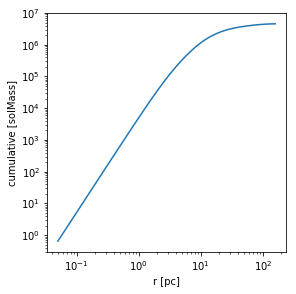

In [16]:
# array grid of radii, log spacing
r = np.logspace(-1.3, 2.2, 100)*u.pc

# calculate cumulative profile
cumulative = mge.Cumulative3D(r, mge3d)

plt.figure(figsize=(4,4))
plt.subplots_adjust(left=0.15, right=0.98, bottom=0.15, top=0.98)
plt.loglog()
plt.plot(r, cumulative)
plt.xlabel("r [{:}]".format(r.unit))
plt.ylabel("cumulative [{:}]".format(cumulative.unit))
plt.show()

---

## 2D CumulativeProfile

Now let's plot the cumulative profile for a projected (2d) MGE.

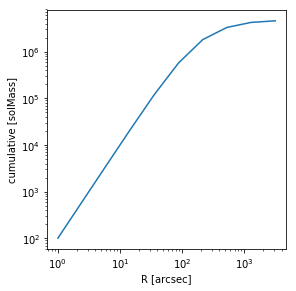

In [17]:
# array grid of projected radii, log spacing
R = np.logspace(0, 3.5, 10)*u.arcsec

# calculate cumulative profile
cumulative = mge.Cumulative2D(R, mge2d, distance=10*u.kpc)

plt.figure(figsize=(4,4))
plt.subplots_adjust(left=0.15, right=0.98, bottom=0.15, top=0.98)
plt.loglog()
plt.plot(R, cumulative)
plt.xlabel("R [{:}]".format(R.unit))
plt.ylabel("cumulative [{:}]".format(cumulative.unit))
plt.show()